# Libraries, Headers and Stuff

In [1]:
import sys
sys.path.append('../../src')

In [2]:
N_STATES = 128
N_EPOCHS = 50
BATCH_SIZE = 32

MAX_VOCAB_SIZE = -1
MAX_SEQUENCE_SIZE = -1

LAYERS_TO_CHECK = [0]

import scores
METRIC = scores.Correlation()

SAMPLES_VERIFY = 8
TEST_RATIO = .05

In [3]:
import datetime
import os

FOLDER_OUT = 'Linux1-' + str(datetime.datetime.today())[:16]
if not os.path.exists(FOLDER_OUT):
    os.makedirs(FOLDER_OUT)

print FOLDER_OUT

Linux1-2017-10-18 22:17


In [4]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


In [5]:
%load_ext rpy2.ipython

In [6]:
import random
random.seed(55555)

# Loads Model

In [7]:
import kernelhelpers
reload(kernelhelpers)

num_layer = 1

path = 'corpus/linux_kernel_val.txt'
model_weights = 'models/corpus_linux_kernel_val_architecture_stateful_type_char_layers_1_hidden_units_128_epoch_49_weights.h5'
model_settings_name = 'settings/corpus_linux_kernel_val_architecture_stateful_type_char_layers_1_hidden_units_128_settings.pickle'
new_batch_size = BATCH_SIZE
new_size = 1
new_time_skip = 1
is_stateful = True

# Loads the model
model,char2int,int2char,model_type = \
    kernelhelpers.load_setup(num_layer,
                path,
                model_weights,
                model_settings_name ,
                new_batch_size,
                new_size,
                new_time_skip,
                is_stateful)

128
lstm_1
Loading model settings/corpus_linux_kernel_val_architecture_stateful_type_char_layers_1_hidden_units_128_settings.pickle
type: basic_architecture


In [8]:
for layer in model.layers:
    print layer

# Creates dataset

In [9]:
raw_data = kernelhelpers.get_corpus('corpus/linux_input.txt')

print 'Number of charaters', len(raw_data)
print 'Number of charaters', len(set(raw_data))

Reading file corpus/linux_input.txt
Number of Words in Current Corpus: 6206996
Number of charaters 6206996
Number of charaters 75


In [10]:
import utils.preprocess as pre

# Generates data
full_size = len(raw_data)
train_size = int((1-TEST_RATIO) * full_size)

train_sequence = raw_data[:train_size]
test_sequence = raw_data[train_size:]

raw_train_sequence = [char2int[c] for c in train_sequence]
raw_test_sequence  = [char2int[c] for c in test_sequence]

# If necessary, truncates:
if MAX_SEQUENCE_SIZE > 0:
    train_size = int(MAX_SEQUENCE_SIZE * (1-TEST_RATIO))
    test_size = int(MAX_SEQUENCE_SIZE * TEST_RATIO)
    raw_train_sequence = raw_train_sequence[:train_size]
    raw_test_sequence  = raw_test_sequence[:test_size]

print 'Training smybols:', len(raw_train_sequence)
print 'Testing smybols:', len(raw_test_sequence)
print 'Size vocabulay:', len(char2int)

Training smybols: 5896646
Testing smybols: 310350
Size vocabulay: 75


In [11]:
import numpy as np
import utils.preprocess as pre
reload(pre)

# Preprocesses training
# SPLITS
X_train_raw = raw_train_sequence[:-1]
y_train_raw = raw_train_sequence[1:]
# ENCODES
X_train = pre.one_hot_encode_seq(X_train_raw, n_chars=len(int2char))
y_train = pre.one_hot_encode_seq(y_train_raw, n_chars=len(int2char))
# SHUFFLES
train_indices = pre.shuffle_indices(len(X_train_raw), BATCH_SIZE)
y_train = y_train[train_indices]
# EXPANDS
X_train = X_train[train_indices,np.newaxis,:]

# Preprocesses testing
# SPLITS
X_test_raw = raw_test_sequence[:-1]
y_test_raw = raw_test_sequence[1:]
# ENCODES
X_test = pre.one_hot_encode_seq(X_test_raw, n_chars=len(int2char))
y_test = pre.one_hot_encode_seq(y_test_raw, n_chars=len(int2char))
# SHUFFLES
test_indices = pre.shuffle_indices(len(X_test_raw), BATCH_SIZE)
X_test = X_test[test_indices, np.newaxis,:]
y_test = y_test[test_indices]

print "Training data:"
print "X:", X_train.shape
print "y:", y_train.shape

print "Test data:"
print "X:", X_test.shape
print "y:", y_test.shape

# Recovers the original training data
X_test_sequence = test_sequence[:X_test.shape[0]]
y_test_sequence = test_sequence[1:X_test.shape[0]+1]
print 'Test sequences:', X_test_sequence[:5], y_test_sequence[:5]
print 'length:', len(X_test_sequence), len(y_test_sequence)

Training data:
X: (5896640, 1, 75)
y: (5896640, 75)
Test data:
X: (310336, 1, 75)
y: (310336, 75)
Test sequences: ['d', 'a', 'y', ',', '\n'] ['a', 'y', ',', '\n', '\t']
length: 310336 310336


# Evaluate

In [12]:
model.reset_states()
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

309472/310336 [============================>.] - ETA: 0s('Test score:', 1.4025413469140813)
('Test accuracy:', 0.60825685708393484)


In [13]:
# Generate samples
import generator as gen
reload(gen)

print gen.complete_sentence_stateful('if ', model, 256, char2int, int2char, BATCH_SIZE)
print '*****'
print gen.complete_sentence_stateful('else', model, 256, char2int, int2char, BATCH_SIZE)

Dimensions of sentence after encoding: (32, 3, 75)
Dimensions of sentence after generation: (32, 260, 75)
if */
	table(sppend_names->cpu(event_len))
		return;

	pagainit_headers:;
	spin_lock(&pre_ends(sync) && !conternal - depage) to be release, backed (function cpu so therrectline thread tracing cpu.  this the page duren.
 */
static void rc->tacked_cpu(compat_siz
*****
Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 261, 75)
elseid,
	.reques		= conselcce_menorait);

static defaultrgep_move_buffer_head(&rcu_do_normblage);

/**
 * audit_crease_ops: ab' sntwore to so than snapshot that cause param, tick. it used ofd.
	 *   unlock).  rcu_rount_parsp(); */
	print_impleme(rlim);
	raw_spi


# Extracts features

In [14]:
import features as feat
reload(feat)

#alphabet = feat.alphabet()

brackets = feat.is_enclosed_bin('(', ')')
curly_brackets = feat.is_enclosed_bin('{', '}')
linepos = feat.line_char_pos_bin()
comments = feat.is_enclosed_str_nodepth('/*','*/')
quotes = feat.is_enclosed_str_nodepth('"', '"')
indent = feat.line_indent_level()
word_hash = feat.char_word_hash(5)
alphanum = feat.alphanum()
word_limits = feat.word_start_end()

r1 = feat.regex('return')
r2 = feat.regex('struct')
r3 = feat.regex('e')
r4 = feat.regex('\d')
r5 = feat.regex('\s')
r6 = feat.regex('\n')
r7 = feat.regex('if\s*\(.*\)')
r8 = feat.regex('for\s*\(.*\)')

features = [linepos, brackets, curly_brackets, comments, 
            indent, word_hash, quotes, alphanum, word_limits,
            r1, r2, r3, r4, r5, r6, r7, r8]

In [15]:
reload(feat)

feature_frame_x = feat.FeatureFrame(features, X_test_sequence)
feature_frame_x.extract()

feature_frame_y = feat.FeatureFrame(features, y_test_sequence)
feature_frame_y.extract()

print'Features for test sequence:'
print feature_frame_x.names
print feature_frame_x.values[:25,:]

print 'Features for test sequence labels:'
print feature_frame_y.names
print feature_frame_y.values[:25,:]

Generating feature scores
Running feature 0 out of 17
Added features ['pos0_10', 'pos10_20', 'pos20_30', 'pos30_40', 'pos40_50', '...']
Running feature 1 out of 17
Added features ["dep_'('')'_1", "dep_'('')'_2", "dep_'('')'_3"]
Running feature 2 out of 17
Added features ["dep_'{''}'_1", "dep_'{''}'_2", "dep_'{''}'_3", "dep_'{''}'_4", "dep_'{''}'_5", '...']
Running feature 3 out of 17
Added features ["enc_'/*''*/'"]
Running feature 4 out of 17
Added features ['indent0', 'indent1', 'indent2', 'indent3', 'indent4', '...']
Running feature 5 out of 17
Added features ['n_gram_0', 'n_gram_1', 'n_gram_2', 'n_gram_3', 'n_gram_4', '...']
Running feature 6 out of 17
Added features ['enc_\'"\'\'"\'']
Running feature 7 out of 17
Added features ['is_alphanum']
Running feature 8 out of 17
Added features ['word_lim']
Running feature 9 out of 17
Added features ["expr'return'"]
Running feature 10 out of 17
Added features ["expr'struct'"]
Running feature 11 out of 17
Added features ["expr'e'"]
Running fe

# Extracts hidden states

In [16]:
import extractor
reload(extractor)
    
ex=extractor.Extractor(model, LAYERS_TO_CHECK)
states = ex.get_states(X_test, batch_size=BATCH_SIZE, unshuffle=True)
nn_config = ex.get_structure()
nn_offsets = ex.get_offets()

print 'states shape:', states.shape
print 'config:', nn_config
print 'offets:', nn_offsets

BEWARE _ ONLY SUPPORTS CONSECUTIVE LAYER IDS STARTING AT 0
Creates spy models
... for id 0 : <controllers.mylstm_legacy.MYLSTM object at 0x7f43283ff490>
Gets the activations for the hidden states
Gets structure
Gets offets
WARNING +++ NOT SUITABLE FOR NON_FORWARD LAYERS
Gets structure
states shape: (310336, 128)
config: [('<controllers.mylstm_legacy.MYLSTM object at 0x7f43283ff490>', 1, 128)]
offets: {(0, 0): 0}


In [17]:
feat_names, feat_mat = feature_frame_x.data

/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


  [1] "d"  "a"  "y"  ","  "\n" "\t" "\t" "t"  "m"  "."  "t"  "m"  "_"  "h"  "o" 
 [16] "u"  "r"  ","  " "  "t"  "m"  "."  "t"  "m"  "_"  "m"  "i"  "n"  ","  " " 
 [31] "t"  "m"  "."  "t"  "m"  "_"  "s"  "e"  "c"  ","  "\n" "\t" "\t" "s"  "y" 
 [46] "s"  "_"  "t"  "z"  "."  "t"  "z"  "_"  "m"  "i"  "n"  "u"  "t"  "e"  "s" 
 [61] "w"  "e"  "s"  "t"  ")"  ";"  "\n" "\n" "\t" "k"  "d"  "b"  "_"  "s"  "y" 
 [76] "s"  "i"  "n"  "f"  "o"  "("  "&"  "v"  "a"  "l"  ")"  ";"  "\n" "\t" "k" 
 [91] "d"  "b"  "_"  "p"  "r"  "i"  "n"  "t"  "f"  "("  "\"" "u"  "p"  "t"  "i" 
[106] "m"  "e"  " "  " "  " "  " "  " "  "\"" ")"  ";"  "\n" "\t" "i"  "f"  " " 
[121] "("  "v"  "a"  "l"  "."  "u"  "p"  "t"  "i"  "m"  "e"  " "  ">"  " "  "(" 
[136] "2"  "4"  "*"  "6"  "0"  "*"  "6"  "0"  ")"  ")"  " "  "{"  "\n" "\t" "\t"


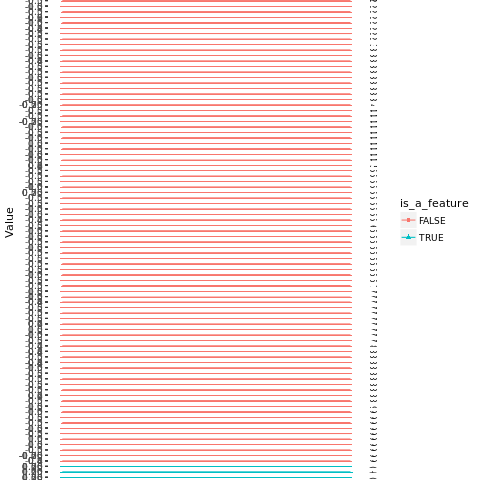

In [18]:
%%R -i feat_names,feat_mat,states,X_test_sequence,FOLDER_OUT

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)
to_plot[['is_a_feature']] <- ! to_plot$Series %in% states_col_names

to_plot <- filter(to_plot, Series %in%states_col_names | is_a_feature)
MAX_TIME <- 150 
to_plot <- filter(to_plot, time <= MAX_TIME)

labels <- X_test_sequence[1:MAX_TIME]
print(labels)

p <- ggplot(to_plot, aes(x=time, y=Value, fill=is_a_feature, color=is_a_feature, shape = is_a_feature)) +
            scale_x_continuous(breaks = sort(unique(to_plot$time)), labels = labels) +
            #scale_y_continuous(limits = c(-1,1), breaks=c(-1,1)) +
            geom_line() +
            geom_point() +
            facet_grid(Series~., scales="free")

ggsave(paste0(FOLDER_OUT, '/activations.pdf'), p, width=40, height=49)

to_plot <- NULL
states <- NULL
feat_mat <- NULL

p

In [19]:
%%R -i feat_names,feat_mat,states,X_test_sequence,FOLDER_OUT

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)

MAX_TIME <- 3000 
to_plot <- filter(to_plot, time <= MAX_TIME)

to_plot$Value <- round(to_plot$Value, 2)
write.csv(to_plot, paste0(FOLDER_OUT, '/activations.csv'), row.names = FALSE)

to_plot <- NULL
states <- NULL
feat_mat <- NULL

# Correlation based attribution

In [20]:
import scores
reload(scores)
import inspector as ip
reload(ip)

insp = ip.Inspector(nn_config, nn_offsets)
mi_scores, names = insp.inspect(states, feature_frame_x, scores.Correlation())

Computing attribution scores
Feture matrix dimensions: (310336, 40)
States dimensions: (310336, 128)
Computing score for feature 0: pos0_10
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 1: pos10_20
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 2: pos20_30
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 3: pos30_40
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 4: pos40_50
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 5: pos50_60
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 6: dep_'('')'_1
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 7: dep_'('')'_2
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 8: dep_'('')'_3
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 9: dep_'{''}'_1
Layer 0
Timestep 0
Scoring neurons 0 to 127
Computing score for feature 10: dep_'{''}'_2

In [21]:
fname = FOLDER_OUT + '/attributions'
hnames = [repr(n) for n in names]
header = ','.join(hnames)
np.savetxt(fname, mi_scores, delimiter=',', header=header, comments='')

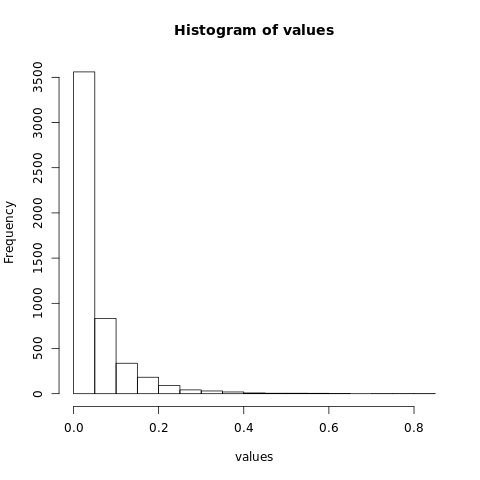

In [22]:
%%R -i mi_scores
values <- c(mi_scores)
hist(values, breaks=30)

In [23]:
feature_neurons = insp.filter_attributions(ip.filter_threshold_abs(.05))
non_feature_neurons = insp.not_attributed()
feature_neurons

{"dep_'('')'_1": [(0, 0, 1),
  (0, 0, 4),
  (0, 0, 9),
  (0, 0, 13),
  (0, 0, 14),
  (0, 0, 19),
  (0, 0, 20),
  (0, 0, 22),
  (0, 0, 23),
  (0, 0, 25),
  (0, 0, 33),
  (0, 0, 34),
  (0, 0, 35),
  (0, 0, 37),
  (0, 0, 38),
  (0, 0, 40),
  (0, 0, 44),
  (0, 0, 50),
  (0, 0, 51),
  (0, 0, 52),
  (0, 0, 53),
  (0, 0, 54),
  (0, 0, 56),
  (0, 0, 58),
  (0, 0, 59),
  (0, 0, 62),
  (0, 0, 66),
  (0, 0, 68),
  (0, 0, 69),
  (0, 0, 70),
  (0, 0, 71),
  (0, 0, 73),
  (0, 0, 76),
  (0, 0, 77),
  (0, 0, 79),
  (0, 0, 84),
  (0, 0, 85),
  (0, 0, 91),
  (0, 0, 93),
  (0, 0, 94),
  (0, 0, 101),
  (0, 0, 102),
  (0, 0, 106),
  (0, 0, 107),
  (0, 0, 112),
  (0, 0, 117),
  (0, 0, 118),
  (0, 0, 119),
  (0, 0, 122),
  (0, 0, 123),
  (0, 0, 125),
  (0, 0, 127)],
 "dep_'('')'_2": [(0, 0, 1),
  (0, 0, 4),
  (0, 0, 14),
  (0, 0, 20),
  (0, 0, 53),
  (0, 0, 71),
  (0, 0, 73),
  (0, 0, 76),
  (0, 0, 91),
  (0, 0, 94),
  (0, 0, 101),
  (0, 0, 107),
  (0, 0, 112),
  (0, 0, 118),
  (0, 0, 123),
  (0, 0, 127)],
 

In [24]:
is_selected = np.zeros_like(mi_scores)
for j, fname in enumerate(names):
    for adress in feature_neurons[fname]:
        i = insp.address_to_column(*adress)
        is_selected[i,j] = 1

/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Ignoring unknown parameters: aes

  warnings.warn(x, RRuntimeWarning)


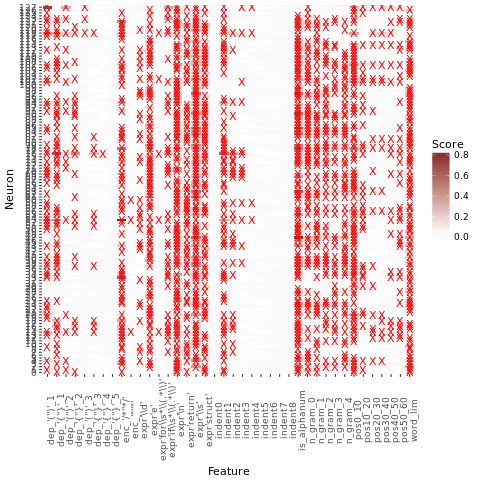

In [ ]:
%%R -i mi_scores,names,is_selected,N_STATES,FOLDER_OUT

library(ggplot2)
library(scales) 
library(dplyr)
library(tidyr)

# Gets scores
data <- as.data.frame(mi_scores)
names(data) <- names
data[['Neuron']] <- factor(0:(nrow(data)-1),
                           levels = 0:(nrow(data)-1),
                           labels = as.character(0:(nrow(data)-1)))
data <- gather(data, key='Feature', value='Score', -Neuron)

# Gets neuron selection
sel <- as.data.frame(is_selected)
names(sel) <- names
sel[['Neuron']] <- factor(0:(nrow(sel)-1),
                           levels = 0:(nrow(sel)-1),
                           labels = as.character(0:(nrow(sel)-1)))
sel <- gather(sel, key='Feature', value='selected', -Neuron)
sel$selected <- ifelse(sel$selected == 1, 'X', '')

# joins
to_plot <- inner_join(data,sel, by = c("Neuron", "Feature"))

p <- ggplot(to_plot, aes(x=Feature, y=Neuron, fill=Score, label=selected)) + 
                geom_bin2d(aes='identity') +
                geom_text(color='red') +
                scale_fill_gradient2(midpoint=median(to_plot$Score),
                                    low = muted("blue"), mid = "white",high = muted("red"),
                                    limits=c(0,NA)) +
                theme(axis.text.x = element_text(angle=90))

ggsave(paste0(FOLDER_OUT, '/attribution_map.pdf'), p, width=40, height=40)

mi_scores <- NULL
is_selected <- NULL
data <- NULL
sel <- NULL
to_plot <- NULL

p

# Does the Unit Test

In [ ]:
import scores
out_base = insp.test(states, feature_frame_x, non_feature_neurons, scores.LogRegF1())
out_base

Computing scores for pos30_40
Computing scores for expr'return'
Computing scores for expr'\\s'
Computing scores for indent1
Computing scores for indent0
ERROR Cant compute score: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0
Computing scores for indent3
Computing scores for indent2
Computing scores for indent5
Computing scores for indent4
Computing scores for indent7
Computing scores for indent6
Computing scores for dep_'('')'_1
Computing scores for dep_'('')'_2
Computing scores for dep_'('')'_3
Computing scores for n_gram_4
Computing scores for expr'struct'
Computing scores for n_gram_1
Computing scores for n_gram_0
Computing scores for n_gram_3
Computing scores for n_gram_2
Computing scores for enc_'/*''*/'
Computing scores for dep_'{''}'_5
Computing scores for dep_'{''}'_4
Computing scores for dep_'{''}'_3
Computing scores for dep_'{''}'_2
Computing scores for dep_'{''}'_1
Computing scores for pos40_50
Computing scores for enc

In [ ]:
# With the correct neuronss 
out = insp.test(states, feature_frame_x, feature_neurons, scores.LogRegF1())
out

Computing scores for expr'\\s'
Computing scores for indent1
Computing scores for indent0
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is required.
Computing scores for indent3
Computing scores for indent2
Computing scores for indent5
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is required.
Computing scores for indent4
Computing scores for indent7
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is required.
Computing scores for indent6
ERROR Cant compute score: Found array with 0 feature(s) (shape=(310336, 0)) while a minimum of 1 is required.
Computing scores for dep_'('')'_1
Computing scores for dep_'('')'_2
Computing scores for dep_'('')'_3
Computing scores for n_gram_4
Computing scores for expr'struct'
Computing scores for n_gram_1
Computing scores for n_gram_0
Computing scores for n_gram_3
Computing scores for n_gram_2
Computing s

{"dep_'('')'_1": 0.91352491343301345,
 "dep_'('')'_2": 0.34790301852496031,
 "dep_'('')'_3": 0.029991789274191993,
 "dep_'{''}'_1": 0.91216561927287187,
 "dep_'{''}'_2": 0.54904927621465227,
 "dep_'{''}'_3": 0.22700968348043402,
 "dep_'{''}'_4": 0.038870172973067905,
 "dep_'{''}'_5": 0,
 'enc_\'"\'\'"\'': 0.20741200584443353,
 "enc_'/*''*/'": 0.94435065761813519,
 "expr'\\\\d'": 0.73909595202745315,
 "expr'\\\\s'": 0.99988837728421232,
 "expr'\\n'": 1.0,
 "expr'e'": 0.99993286938613524,
 "expr'for\\\\s*\\\\(.*\\\\)'": 0.057196891303669228,
 "expr'if\\\\s*\\\\(.*\\\\)'": 0.72958999543447323,
 "expr'return'": 0.78313854818642847,
 "expr'struct'": 0.76303202413979732,
 'indent0': 0,
 'indent1': 0.89211599509765704,
 'indent2': 0.55212151040947355,
 'indent3': 0.24300631682185705,
 'indent4': 0.094033401903780955,
 'indent5': 0,
 'indent6': 0,
 'indent7': 0,
 'indent8': 0,
 'is_alphanum': 0.99942356136632016,
 'n_gram_0': 0.3968250744008554,
 'n_gram_1': 0.40595067283886949,
 'n_gram_2': 0

In [ ]:
# Prepares and saves a df
testnames = out.keys()
baseline = [out_base[t] for t in testnames]
candidate = [out[t] for t in testnames]

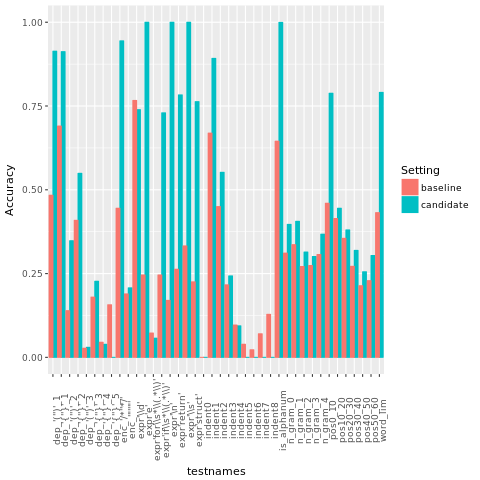

In [ ]:
%%R -i testnames,baseline,candidate,FOLDER_OUT

toplot <- data.frame(testnames, baseline, candidate)
write.csv(toplot, paste0(FOLDER_OUT,'/test_results'),row.names = FALSE)

dat <- gather(toplot, key='Setting', value='Accuracy', -testnames)

p <- ggplot(dat, aes(x=testnames, y=Accuracy, fill=Setting, color=Setting)) +
        geom_bar(stat='identity', position='dodge') +
        theme(axis.text.x = element_text(angle=90))

print(p)
ggsave(paste0(FOLDER_OUT, '/test_scores.pdf'), p, width=40, height=10)

# Kevinizes

In [ ]:
from controllers import control
reload(control)
import verify
reload(verify)

verifier = verify.Verifier(model, feature_neurons, non_feature_neurons)
v_scores = verifier.run(feature_frame_y, X_test, y_test, BATCH_SIZE, sample_size=SAMPLES_VERIFY)

*** Testing the neurons for feature pos0_10
* Computing original accuracy


/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/thib/.virtualenvs/keras/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


* Computing baseline accuracies
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
* Computing candidate accuracies
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Round 6
Round 7
{'original': {0.0: [0.44565239947644419], 1.0: [0.51079946663919618]}, 'candidate': {0.0: [0.38232092071285184, 0.43663233754758723, 0.4100478030276084, 0.38232092071285184, 0.43663233754758723, 0.4100478030276084, 0.38232092071285184, 0.43663233754758723], 1.0: [0.44734612716016642, 0.49608484023760424, 0.50149017800242812, 0.44734612716016642, 0.49608484023760424, 0.50149017800242812, 0.44734612716016642, 0.49608484023760424]}, 'baseline': {0.0: [0.34952661292922843, 0.34952661292922843, 0.35226610679966736, 0.34952661292922843, 0.35226610679966736, 0.35226610679966736, 0.44639263963810799, 0.44639263963810799], 1.0: [0.39926908491550683, 0.39926908491550683, 0.42780146941491204, 0.39926908491550683, 0.42780146941491204, 0.42780146941491204, 0.50473641134515967, 0.50473641134515967]}}
*** Testi

In [ ]:
for feat in v_scores:
    print '---', feat
    for setup in v_scores[feat]:
        print '-', setup
        for y in v_scores[feat][setup]:
            s = v_scores[feat][setup][y]
            print y, ':', 'mean:', np.mean(s), '- sd:', np.std(s) 

In [ ]:
verifier.test_diff()

In [ ]:
import pandas as pd

out = None

for feat in v_scores:
    print '---', feat
    for setup in v_scores[feat]:
        print '-', setup
        for y in v_scores[feat][setup]:
            s = np.array(v_scores[feat][setup][y])
            print y, ':', 'mean:', np.mean(s), '- sd:', np.std(s) 
            s_y = np.repeat(y, len(s))
            s_setup = np.repeat(setup, len(s))
            s_feat = np.repeat(feat, len(s))
            df = pd.DataFrame({
                'acc' : s,
                'feat_val': s_y,
                'feature': s_feat,
                'setup' : s_setup
            })
            if out is None:
                out = df
            else:
                out = pd.concat([out, df], axis = 0)

print out
out.to_csv(FOLDER_OUT+'/kevinizers.csv',index=False)

# Post experiment checks

In [ ]:
feat_names = feature_frame_x.names
feat_mat = feature_frame_x.values

In [ ]:
%%R -i feat_names,X_test_sequence,feat_mat,states

FEATURE <- c('char_i')
NEURON <- c('_156')

MIN_TIME <- 0
MAX_TIME <- 1000

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)
to_plot[['is_a_feature']] <- ! to_plot$Series %in% states_col_names


to_plot <- filter(to_plot, Series %in% states_col_names | is_a_feature)
to_plot <- filter(to_plot, Series %in% c(FEATURE, NEURON))
to_plot <- filter(to_plot, time >= MIN_TIME, time <= MAX_TIME)

labels <- X_test_sequence[MIN_TIME:MAX_TIME]


p <- ggplot(to_plot, aes(x=time, y=Value, fill=is_a_feature, color=is_a_feature, shape = is_a_feature)) +
            scale_x_continuous(breaks = sort(unique(to_plot$time)), labels = labels) +
            #scale_y_continuous(limits = c(-1,1), breaks=c(-1,1)) +
            geom_line() +
            geom_point() +
            facet_grid(Series~., scales="free")
print(p)

fi <- paste0('~/Desktop/focus', paste0(FEATURE, collapse=""), paste0(NEURON, collapse=""), '.pdf')
h <- length(FEATURE) + length(NEURON)
ggsave(fi, p, width=40, height=h)

In [14]:
# Neuron control experiments

In [23]:
from controllers import control

In [33]:
print gen.complete_sentence_stateful('function ', model, 1024, char2int, int2char, BATCH_SIZE)

Dimensions of sentence after encoding: (32, 9, 75)
Dimensions of sentence after generation: (32, 1034, 75)
function (&unregictered == 0)))
		return 1;

	rcu_read_races(tesk);
	else if (t)					\
		}
			destrocedpf_rt_lock_next(sizeof((unsigned long)fip_state));
		pr_info("tick "
			    10001 << ongrame_fn)
		++null + info_consets->next_cleannonexec;
		*ters = t(ktime_get_branch();
		raw_spin_lock_irqsave(&ccu_put_ucpus_list);
		expirq_put(is_start_nr(&comp),
				   (, 0);\nprf.nodd + size_targeture) {
			return list_fyn;
			rr_trie_cpu(p)();

		ret = args[ptr->self_disable_data;
		last_trace_index[commit_excluct_and];
		err = all_tff(emptystag_bpation);
		t->type->buf,
			     sched_clock_nrcend(size_t ret));
}

/**
 * round-- module rcu print_lock of an olded alrote, */
	raw_spin_unlock(&rtick_irq_set_notrace_events);

	tracing_inc(&p __conplete_dynaip_nr_data);
}

static void buffer->next
 * length beform zero in inlock
 * ->iscall for event
 *
 *
 *	disabled to reserval term
 * own
	

In [32]:
# Tentative for curly brackets
# Does not work too well
hacked_model = control.set_neuron_value_mysltm(model, {0:{76:0.25}})
out = gen.complete_sentence_stateful('function ', hacked_model, 1024, char2int, int2char, BATCH_SIZE)
print ''
print out

Dimensions of sentence after encoding: (32, 9, 75)
Dimensions of sentence after generation: (32, 1034, 75)

function we don't olls rcu is after the on furct coredent to free preempt data herwaps	call-the user if we do n------- \no_start to rcu oft infor pages and cpu paras and pmu per_cpu  -perming the long hos minch time. when the hiod rcu_start secther proces.
		 */
		disakloc(cb);
};

	if (buffer->aux_max_locks_noth - !cpu)
		return 1;
	/* in number of repor interrupt t= value when interrupt boo dumpe affecture this memory an records to be courcal */
		.irqsetprobe_depleed. = fs_bename;

	/* page contanling rcu allemope cops.\n" buntify - mearator of disabled bjq page pool map a & 0xtecluce_seq.no record, if the dirace trace, an an cpu_lock_sched to alve */
		return 0;
}
export_symbol_gpn(/unc_user_list_ety_delay_count(c, p, unused before skipp).
 *
 *  state an runtite caccess on wait only subsystem) we no offset the incceptirnc is direchances abost is hie completed when thes to_ca

In [37]:
# Tentative for comments
# Works awesome!
hacked_model = control.set_neuron_value_mysltm(model, {0:{53:-1}})
out = gen.complete_sentence_stateful('function ', hacked_model, 1024, char2int, int2char, BATCH_SIZE)
print ''
print out

Dimensions of sentence after encoding: (32, 9, 75)
Dimensions of sentence after generation: (32, 1034, 75)

function interrace, waiting cpu.  cleanode is its whethed vish.bito tasks are is callers
 * from stricteded of
	 * return than the update where an datanger
 *
 * allow, we long rcu access in one shoped preesd to free
 * lock-buf tfa state. */
		/* excepting rcu dependend/rcus section don't adjuftion */
		/* type of the list accounted directuring spents ts, local.
 *
 * the crashly an
 * elppiame out log' a buffer through it is ring
	 * itcecred the suft this the cpu mask to the file rate_blockes.
 *
 * copyric is is no execution.
 *  lporing to should into being context.
 */
void rcu state was modifiem wake use
 * calch cpu only
 * interrupt; then an lock callock pages to here
 * have veriacra mechrsion.
 */
struct atceven with in the markored by a write
 */
static unsigned to fielding
	 * clear there enter parse -> could
 * called briate */
	case check of or
 * entry posimint st

In [38]:
# Tentative for indentation
# Works awesome!
hacked_model = control.set_neuron_value_mysltm(model, {0:{76:-1}})
out = gen.complete_sentence_stateful('function ', hacked_model, 1024, char2int, int2char, BATCH_SIZE)
print ''
print out

Dimensions of sentence after encoding: (32, 9, 75)
Dimensions of sentence after generation: (32, 1034, 75)

function has lockle
 *
 * rnsibv_to_cpu(struct is_ople_exparats)
{
}

/*
 *
 * commit

static
struct kpr_ptr *fill_t (tgftum_num_bm_state);

/*
 * provt_call/and the runnab kthread
 *
 * com/incerriad by global in it strupt
 *
 *
 * at val before

 *
 * preemptort.
 *
 * rff_print_rcu_node and
 * arch_state wast, soatchedulifienfly.
 *
 * whole
 *
 * no flags */

/*
 * arque.
 *
 * 
sys/rt_mod_hotel */
parte(struct file_enable *r, u64 only
};

startion from this
	 * */
export_mode_rance_ns
}

/*
 * resurt
 *
 * broal the task call
 * want to remove whe
	 * */
static void
preempt_entry
static unsigned intinges_bpr_fach;

/*
 * capu
 *
 * compulate func() */

static void
count *free = get_cgroup(struct over *cpu)
{
	struct spentrist *donc;

static unsigned long thread_loff_thread_class(struct file_blocked_tasks_t *new_buf_str, struct
state_reques *ns
#define taskperghtr(struct pl_t

In [47]:
# Tentative for if.then
# no work
hacked_model = control.set_neuron_value_mysltm(model, {0:{123:0}})
out = gen.complete_sentence_stateful('if (', hacked_model, 150, char2int, int2char, BATCH_SIZE)
print ''
print out
out = gen.complete_sentence_stateful('if (', hacked_model, 150, char2int, int2char, BATCH_SIZE)
print ''
print out

Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 155, 75)

if (rn);
	do_saverse(trace_prio_cpu);
	/*#iffectraie task is a procent a ras before record from
 * if which may handlers the task irq by not al hav now add
Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 155, 75)

if (__irqs_v_action_inc))
		mem_postimize_proced(&per);

	/* ipters, cound thal oll hapded.
 */
static struct ks_rec = strnode_data_leq;
	unsigned int alke


In [54]:
# Tentative for linebreaks
# yay!
hacked_model = control.set_neuron_value_mysltm(model, {0:{71:-1}}) 
out = gen.complete_sentence_stateful('if (', hacked_model, 1024, char2int, int2char, BATCH_SIZE)
print ''
print out
hacked_model = control.set_neuron_value_mysltm(model, {0:{71:1}}) 
out = gen.complete_sentence_stateful('if (', hacked_model, 512, char2int, int2char, BATCH_SIZE)
print ''
print out

Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 1029, 75)

if (&tick_seq_cpu_ptr_ctx->consum);
}
#endif voup creates_trace_connace_sched
 * boon that as argsoasing in the task. whis buffer-counter
 *      32-ticke asses on the suspers on a per_cpu envowrite aveff, int read rcu scalsed for the requable from this function
 * stalls this rwsem from that a schedu 12 bon atticks, no requirs cld_usen cache of
 * console_idle ->lock for any hands to rcu_read_scheding withoup a pacled for that bussouts cpus_counthes *can. this.
 *
 * current from any we cannblo this errer and current difd poinl)
	 * callocaf egab: if kerne wors error we rav_iter. */
static void rcu_cpus_test_debug *cpu_entry,
			    gfp_kernel);

#ifdef config_idle_acgs (void __load_get_base_w_arch_entaig_page))
 kesng_2)
#define acce_unlock_irq(asvan->node) != 0) * con_could_data * disable in t acquirqtude, and process that consivered cpu.
 *
 * starting */ cpuset_cpu_compack_d

In [59]:
# Tentative for whitespaces
# yay!
# hacked_model = control.set_neuron_value_mysltm(model, {0:{47:-1}}) 
# out = gen.complete_sentence_stateful('if (', hacked_model, 1024, char2int, int2char, BATCH_SIZE)
# print '\n++++++'
# print out
# hacked_model = control.set_neuron_value_mysltm(model, {0:{47:1}}) 
# out = gen.complete_sentence_stateful('if (', hacked_model, 512, char2int, int2char, BATCH_SIZE)
# print '++++++'
# print out

hacked_model = control.set_neuron_value_mysltm(model, {0:{63:-1}}) 
out = gen.complete_sentence_stateful('if (', hacked_model, 1024, char2int, int2char, BATCH_SIZE)
print '++++++'
print out
hacked_model = control.set_neuron_value_mysltm(model, {0:{63:1}}) 
out = gen.complete_sentence_stateful('if (', hacked_model, 512, char2int, int2char, BATCH_SIZE)
print '++++++'
print out


Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 1029, 75)
++++++
if (kg_wait)
#def
	defs_offfs_fiex:
		p(kc_net_fl_fai = ->nod + l
		raw_nake_delse(new_pagest_fa_sec < 0
 = ps->nf_fa {
	/** * / up_page_ke=0
	r <f
#eliee
state state_kp_gp_up_gr
	_dbb_eace_field_op_now(watch is st ftleed ead cp_op) f_ops
 *


#if ke:
	rp_sk:
		fore_offset(" 0 of is fict firdk fr wakes fas bal fasline, with be represoir fier */
	st_ene_basp(nak_fa_page, stall >fiff *
	fl_ft.cv
	/*
 **
 || !kz
	}
epp:
	kep_eace_wait(stallek *fiff)() /*  *ke dase rea wait write st, we wer's
 *
 *
 */


/**
 * will /*tsuf alf_kf_ffsec kp_kb_free *>

/*
 */

state_cal:
	ftere_wrice:

pe_posh_dec_data_off(fferve_pos **net)
	_declace_pais
	*fl_pf(ops);



/* exp_stf: ta pt re_cp(ug_ing_releasts_ns(rgf) of wr nst
 * {
	str = p->page ->fole_each_desce;

	/* f (of sp is sp if -epe resume wake frreft pagets is be do_bplabll. */

/*
 */


/*
 *   n < ktert_leg_form_k_idpet_ence cpu ne